In [1]:
from math import factorial
from sympy import * 
import numpy as np
import matplotlib.pyplot as plt

# Create the function f(x)
x = symbols('x')
#fx = ln(1 + (1/x)**3)		#original
fx = (x*((1-(x**2))**0.5)*(-384*(x**8) + 1488*(x**6) -2104*(x**4) +1210*(x**2) -105) + 105*asin(x))/3840
x0 = 0.485 # expand about the point x_0 = 1
N = 51 # get first 20 coefficients

f_n = {} # nth derivatives of f(x)
f_n_x0 = {} # nth derivatives, but evaluated at x = x_0
f_n[1] = diff(fx,x,1) # differentiate f(x)
f_n_x0[1] = f_n[1].subs({x:x0}).evalf() # do the substitution

for i in range(2,N+1):
	f_n[i] = diff(f_n[i-1],x,1) 
	# it's more efficient to differentiate the previous derivative
	# once than to directly ask for the nth derivative
	f_n_x0[i] = f_n[i].subs({x:x0}).evalf()
	

def P(N,Y): 
	# Y should contain N symbolic derivatives, where
	# Y[1] is the first derivative of f(x),
	# Y[2] is the second derivative of f(x), etc
	# 
	# Returns a hash table P: (i,j) -> symbolic equation
	# where P[(i,j)] = P(i,j) from the paper
	P = {}
	for j in range(1,N+1): 
		P[(j,j)] = Y[1]**j
		for k in range(j+1,N+1):
			P[(j,k)] = 0
			for l in reversed(range(1,k-j+1)): 
				P[(j,k)] = P[(j,k)] + (l*j - k + j + l) * Y[l+1] / factorial(l+1) * P[(j,k-l)]
			P[(j,k)] = P[(j,k)]*1/(k-j) * 1/Y[1]
	return P


P = P(N,f_n_x0) # Compute P[(i,j)] using substituted versions of f_n(x)

b_n = {} # Vector of pre-computed dummy variable values
b_n[1] = 1/f_n_x0[1]

c_n = {} # vector of Taylor series coefficients
c_n[1] = b_n[1] / factorial(1)

for n in range(2,N+1):

	b_n[n] = 0
	for j in range(1,n): 
		b_n[n] = b_n[n] + b_n[j]/factorial(j) * P[(j,n)]
	b_n[n] = b_n[n] * factorial(n) * -1*b_n[1]**n 
	c_n[n] = b_n[n] / factorial(n)
	
def TaylorApprox(x, x0, y0, coefficients): 
	# x0: point about which we do expansion
	# coefficients: coefficient for each value n = 1, 2, ... 
	# y0: y(x0)
	# x: set of points at which to evaluate the Taylor Series approximation 
	y = np.zeros_like(x)
	for i,ci in enumerate(coefficients): 
	#	print(y, x, x0, ci)
		y += (x - x0)**(i+1) * float(ci)
	y += y0
	return y







[-0.1270211  -0.12677371 -0.12652654 ...  1.10627155  1.10645996
  1.10664849]


C:\Users\albad\AppData\Local\Temp\ipykernel_15732\904729860.py:11: RuntimeWarning: invalid value encountered in sqrt
  plt.plot((x_hat*((1-(x_hat**2))**0.5)*(-384*(x_hat**8) + 1488*(x_hat**6) -2104*(x_hat**4) + 1210*(x_hat**2) - 105) + 105*np.arcsin(x_hat))/3840, x_hat, 'k-', linewidth = 2, label = 'Actual $f^{-1}(y)$')
C:\Users\albad\AppData\Local\Temp\ipykernel_15732\904729860.py:11: RuntimeWarning: invalid value encountered in arcsin
  plt.plot((x_hat*((1-(x_hat**2))**0.5)*(-384*(x_hat**8) + 1488*(x_hat**6) -2104*(x_hat**4) + 1210*(x_hat**2) - 105) + 105*np.arcsin(x_hat))/3840, x_hat, 'k-', linewidth = 2, label = 'Actual $f^{-1}(y)$')


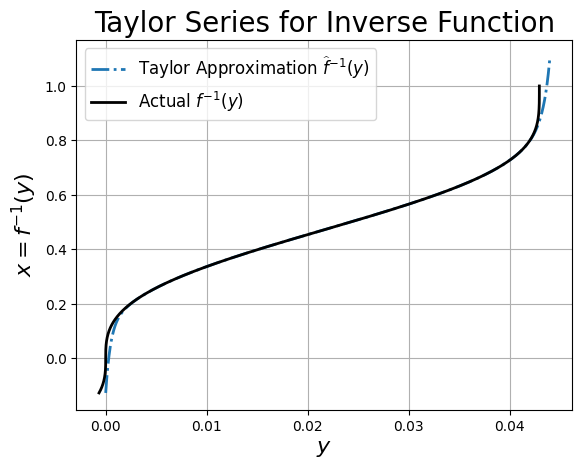

In [2]:
coeffs = [c_n[i] for i in range(1,N+1)]
y = np.linspace(0,0.044,100001)
#y0 = np.log(1 + (1.0/x0)**3)     #original
y0 = (x0*((1-x0**2)**0.5)*(-384*x0**8 + 1488*x0**6 -2104*x0**4 +1210*x0**2 -105) + 105*np.arcsin(x0))/3840
x_hat = TaylorApprox(y, y0, x0, coeffs)
print(x_hat)

plt.figure()
plt.plot(y, x_hat, '-.', linewidth = 2, label = 'Taylor Approximation $\\widehat{f}^{-1}(y)$')
#plt.plot(np.log(1 + (1.0/x_hat)**3), x_hat, 'k-', linewidth = 2, label = 'Actual $f^{-1}(y)$')
plt.plot((x_hat*((1-(x_hat**2))**0.5)*(-384*(x_hat**8) + 1488*(x_hat**6) -2104*(x_hat**4) + 1210*(x_hat**2) - 105) + 105*np.arcsin(x_hat))/3840, x_hat, 'k-', linewidth = 2, label = 'Actual $f^{-1}(y)$')
#plt.plot((x_hat*((1-(x_hat**2))**0.5)*(-384*(x_hat**8) + 1488*(x_hat**6) -2104*(x_hat**4) + 1210*(x_hat**2) - 105) + 105*(x_hat + (x_hat**3)/6 + 3*(x_hat**5)/40))/3840, x_hat, 'k-', linewidth = 2, label = 'Actual $f^{-1}(y)$')
plt.xlabel("$y$", fontsize = 16)
plt.ylabel("$x = f^{-1}(y)$", fontsize = 16)
plt.title("Taylor Series for Inverse Function",fontsize = 20)
plt.legend(fontsize = 12)
plt.grid(which = 'both')
#plt.ylim(0, 1)
#plt.xlim(0, 0.044)
plt.show()

C:\Users\albad\AppData\Local\Temp\ipykernel_15732\2613196980.py:1: RuntimeWarning: invalid value encountered in sqrt
  plt.plot((x_hat*((1-(x_hat**2))**0.5)*(-384*(x_hat**8) + 1488*(x_hat**6) -2104*(x_hat**4) + 1210*(x_hat**2) - 105) + 105*np.arcsin(x_hat))/3840- y)
C:\Users\albad\AppData\Local\Temp\ipykernel_15732\2613196980.py:1: RuntimeWarning: invalid value encountered in arcsin
  plt.plot((x_hat*((1-(x_hat**2))**0.5)*(-384*(x_hat**8) + 1488*(x_hat**6) -2104*(x_hat**4) + 1210*(x_hat**2) - 105) + 105*np.arcsin(x_hat))/3840- y)


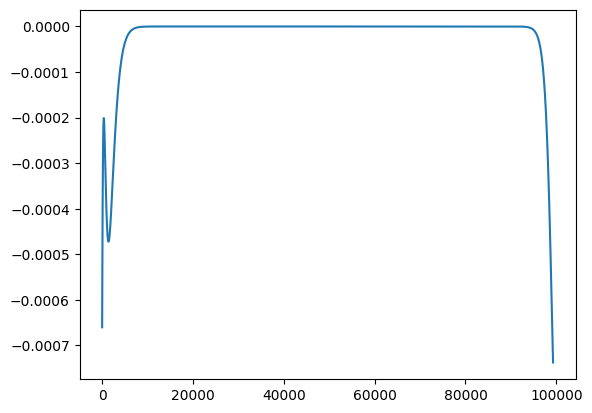

In [3]:
plt.plot((x_hat*((1-(x_hat**2))**0.5)*(-384*(x_hat**8) + 1488*(x_hat**6) -2104*(x_hat**4) + 1210*(x_hat**2) - 105) + 105*np.arcsin(x_hat))/3840- y)

In [4]:
print(x_hat)
with open("x(t).txt", "w") as f:     #file ready to be given to the C code (old stuff)
    np.savetxt(f, np.column_stack([y, x_hat]), delimiter=" ")
    
#y = f(q)
#x_hat = q

[-0.1270211  -0.12677371 -0.12652654 ...  1.10627155  1.10645996
  1.10664849]
